# Imports

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [107]:
data = pd.read_csv('./data/application_train_vf.csv')
validation = pd.read_csv('./data/application_test_vf.csv')
bureau = pd.read_csv('./data/bureau.csv')
credit_card = pd.read_csv('./data/credit_card_balance.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
install_pay = pd.read_csv('./data/installments_payments.csv')
pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')
previous_app = pd.read_csv('./data/previous_application.csv')

# Dates

In [108]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

# Missing values

## Variables catégorielles

In [109]:
data.drop(columns='Unnamed: 0',inplace = True)

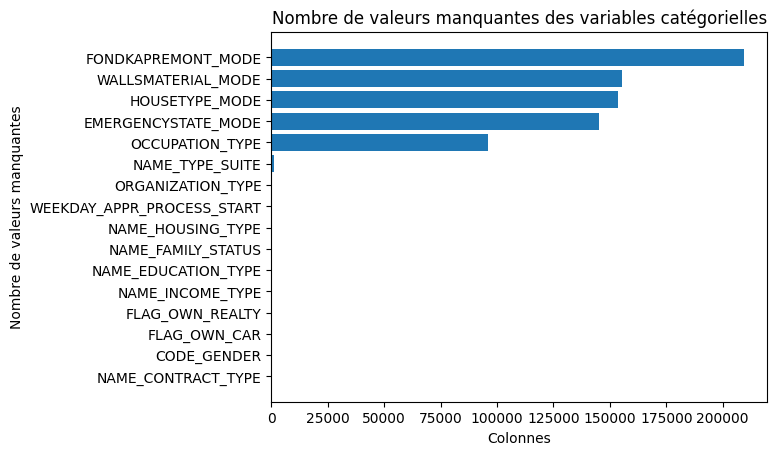

In [110]:
missing_values = data.select_dtypes(include = 'object').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables catégorielles')

plt.show()

## Variables indicatrices

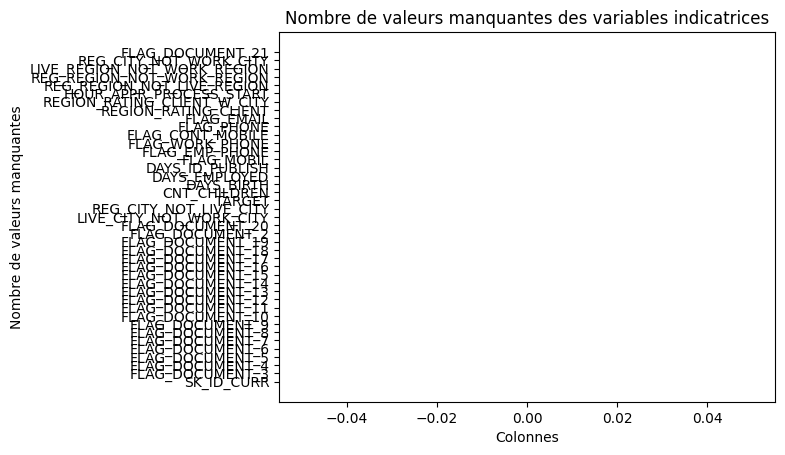

In [111]:
missing_values = data.select_dtypes(include = 'int').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables indicatrices')

plt.show()

## Variables continues

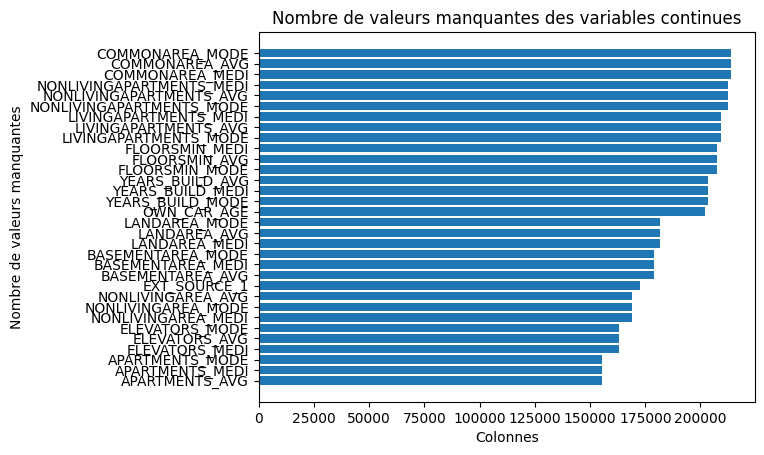

In [112]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values>155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

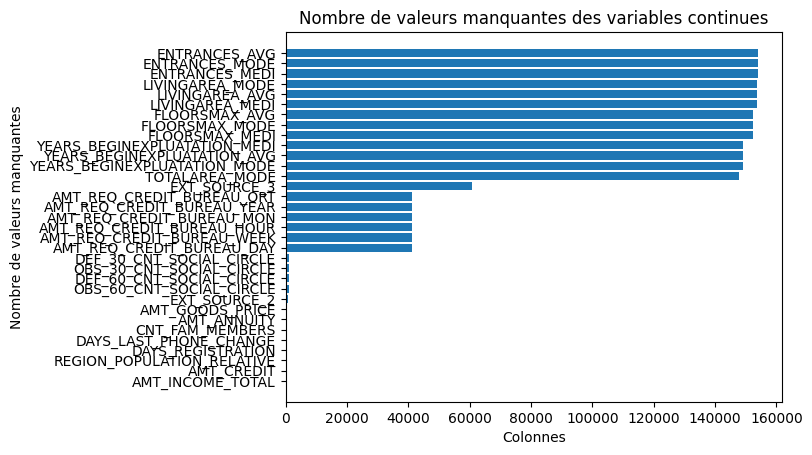

In [113]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values<155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

# Variables categorielles

In [114]:
for col in data.select_dtypes(include ='object').columns:
    print(f"{col} : {data[col].nunique()} catégories différentes")
print('On va pouvoir les One Hot Encoder :)')

NAME_CONTRACT_TYPE : 2 catégories différentes
CODE_GENDER : 3 catégories différentes
FLAG_OWN_CAR : 2 catégories différentes
FLAG_OWN_REALTY : 2 catégories différentes
NAME_TYPE_SUITE : 7 catégories différentes
NAME_INCOME_TYPE : 8 catégories différentes
NAME_EDUCATION_TYPE : 5 catégories différentes
NAME_FAMILY_STATUS : 6 catégories différentes
NAME_HOUSING_TYPE : 6 catégories différentes
OCCUPATION_TYPE : 18 catégories différentes
WEEKDAY_APPR_PROCESS_START : 7 catégories différentes
ORGANIZATION_TYPE : 58 catégories différentes
FONDKAPREMONT_MODE : 4 catégories différentes
HOUSETYPE_MODE : 3 catégories différentes
WALLSMATERIAL_MODE : 7 catégories différentes
EMERGENCYSTATE_MODE : 2 catégories différentes
On va pouvoir les One Hot Encoder :)


# Variables numériques

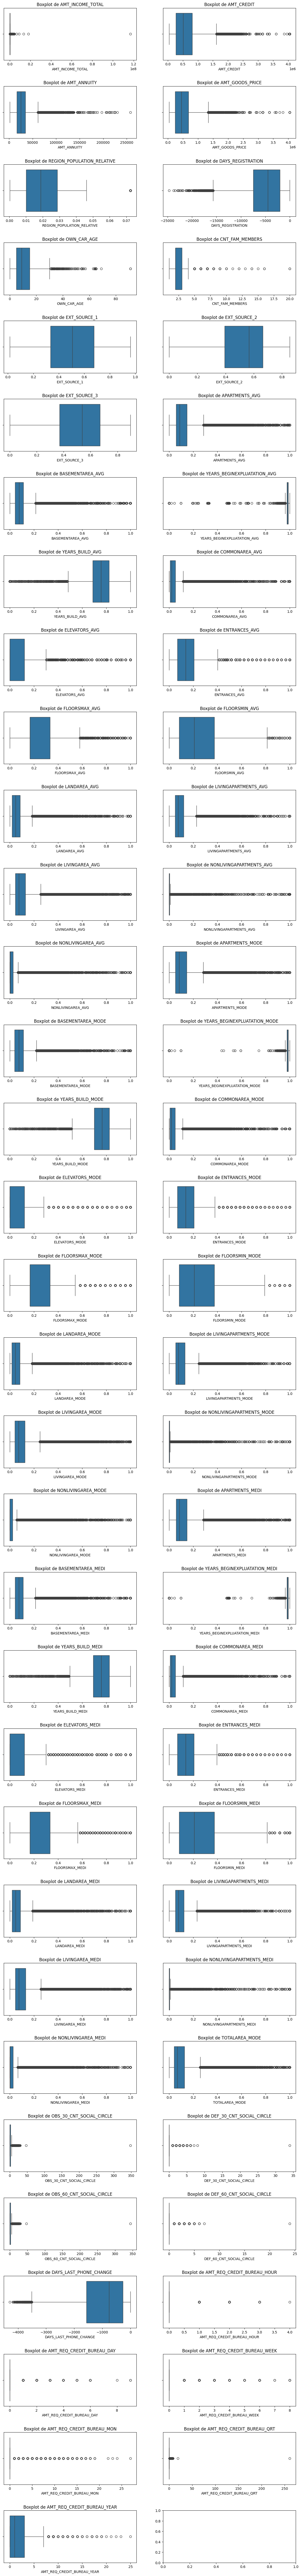

In [115]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

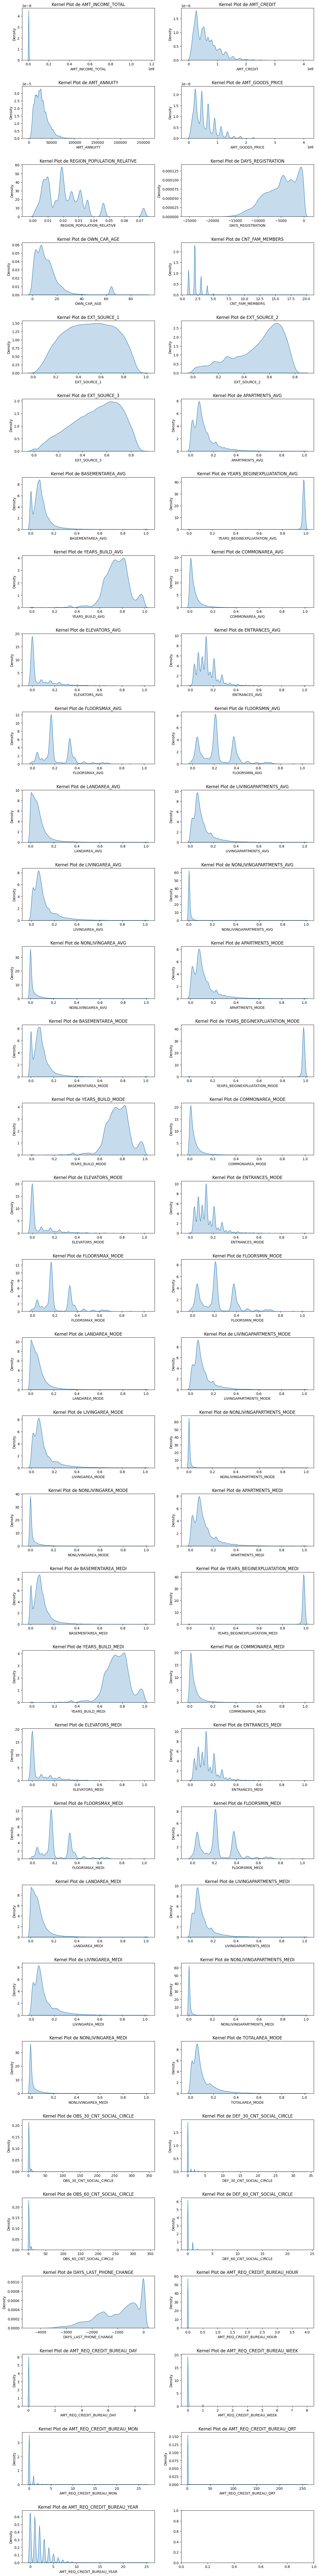

In [116]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Corrélations entre variables numériques

In [117]:
import numpy as np
corr_matrix = data.select_dtypes(include='number').corr(method='spearman')



In [118]:
col_corr = np.transpose(corr_matrix[np.abs(corr_matrix['TARGET'])>0.05]).columns
corr = corr_matrix.loc[col_corr,col_corr]

In [119]:
fig = px.imshow(corr, x=corr.columns, y=corr.columns, labels=dict(color='Corrélation'), color_continuous_midpoint=0)
fig.update_layout(title_text="Matrice de corrélation - Spearman")

# Ajustez la taille du graphique en fonction de la taille de l'écran
fig.update_layout(
    width=700,  # Vous pouvez ajuster la largeur en fonction de vos besoins
    height=700  # Vous pouvez ajuster la hauteur en fonction de vos besoins
)

fig.show()